In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
ip = pd.read_csv("aggregated_sensor.csv", index_col = 0)
ip = ip.sort_index()

In [3]:
ip.device.unique()

array(['GPS', 'Gyrometer (smooth)', 'Attitude', 'Acceleration (via User)',
       'Acceleration (via Gravity)', 'Accelerometer (raw)',
       'Acceleration (total)', 'Bluetooth', 'Altimeter (Barometer)',
       'Gyrometer (raw)', 'Cell Radio', 'Proximity', 'Battery',
       'Device Orientation', 'Magnetometer (corrected for device)',
       'Magnetometer (raw)', 'Screen', 'Compass', 'Microphone', 'Storage',
       'Memory', 'Device', 'WiFi'], dtype=object)

In [4]:
#ip.loc[lambda r: r["data.name"] == "Latitude" | r["data.name"] == "Longitude", :]
GPS = ip.loc[(ip['data.name'] == "Latitude") | (ip['data.name'] == "Longitude"), :]

In [5]:
GPS['data.raw'] = pd.to_numeric(GPS['data.raw'])
GPS['data.display'] = pd.to_numeric(GPS['data.display'])
GPS.dtypes

/home/andrew/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/andrew/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


_user_id         object
data.display    float64
data.name        object
data.raw        float64
device           object
dtype: object

In [6]:
from datetime import *
GPS.index = GPS.index.to_datetime()
#GPS.ix[datetime(2017, 3, 9):datetime(2017, 3, 11)]

/home/andrew/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  from ipykernel import kernelapp as app


In [7]:
lat = GPS.loc[GPS['data.name'] == 'Latitude']
lon = GPS.loc[GPS['data.name'] == 'Longitude']

In [8]:
latE = lat.loc[lat['_user_id'] == "Emil"]
lonE = lon.loc[lon['_user_id'] == "Emil"]

latG = lat.loc[lat['_user_id'] == "Glen"]
lonG = lon.loc[lon['_user_id'] == "Glen"]

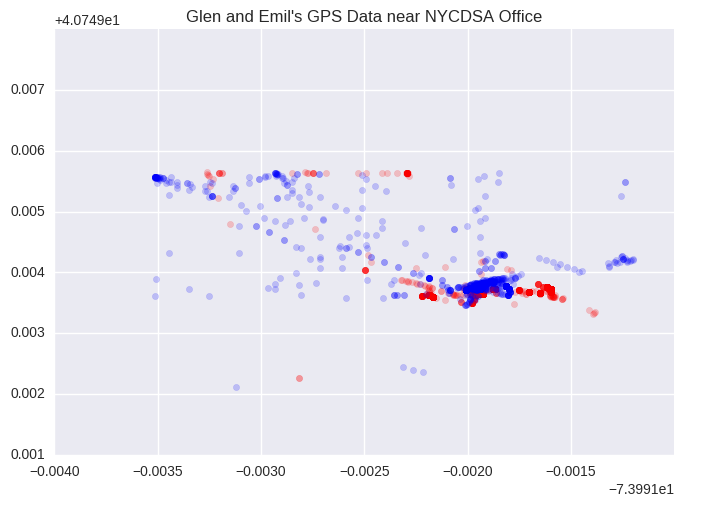

In [9]:
plt.scatter(lonE['data.raw'], latE['data.raw'], color = 'red', alpha = .2)
plt.scatter(lonG['data.raw'], latG['data.raw'], color = 'blue', alpha = .2)

plt.xlim(-73.995, -73.992)
plt.ylim(40.75, 40.757)
plt.title("Glen and Emil's GPS Data near NYCDSA Office")

plt.show;

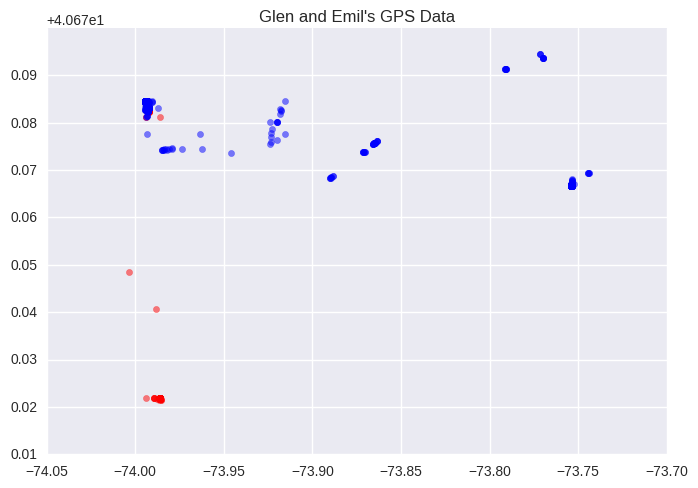

In [10]:
plt.scatter(lonE['data.raw'], latE['data.raw'], color = 'red', alpha=.5)
plt.scatter(lonG['data.raw'], latG['data.raw'], color = 'blue', alpha=.5)
plt.title("Glen and Emil's GPS Data")

In [11]:
GPS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8598 entries, 2017-03-08 10:38:48 to 2017-03-14 09:47:38
Data columns (total 5 columns):
_user_id        8598 non-null object
data.display    8598 non-null float64
data.name       8598 non-null object
data.raw        8598 non-null float64
device          8598 non-null object
dtypes: float64(2), object(3)
memory usage: 403.0+ KB


In [12]:
latE.ix['2017-03-11']

,_user_id,data.display,data.name,data.raw,device
2017-03-11 00:46:03,Emil,40.691864,Latitude,40.691864,GPS
2017-03-11 09:41:14,Emil,40.691861,Latitude,40.691861,GPS
2017-03-11 09:41:14,Emil,40.691605,Latitude,40.691605,GPS
2017-03-11 09:41:27,Emil,40.691861,Latitude,40.691861,GPS
2017-03-11 09:41:27,Emil,40.691861,Latitude,40.691861,GPS
2017-03-11 09:55:32,Emil,40.691861,Latitude,40.691861,GPS
2017-03-11 15:11:38,Emil,40.691872,Latitude,40.691872,GPS
2017-03-11 15:19:38,Emil,40.691800,Latitude,40.691800,GPS
2017-03-11 15:19:38,Emil,40.691800,Latitude,40.691800,GPS


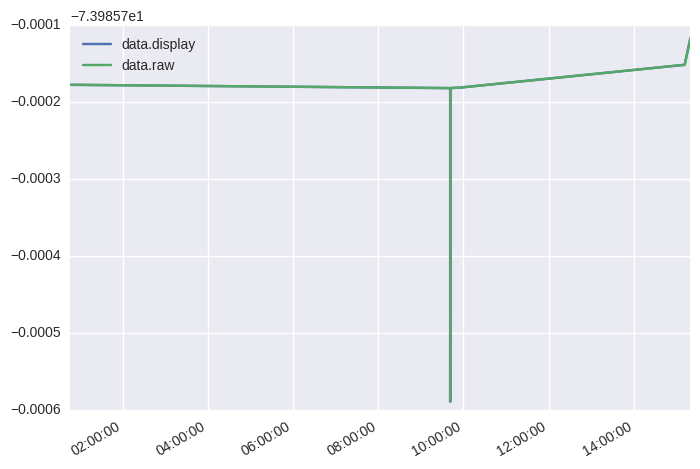

In [13]:
lonE.ix['2017-03-11'].plot()

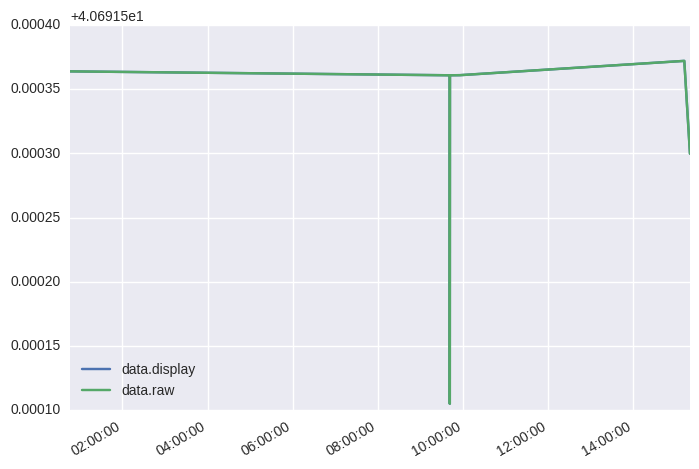

In [14]:
latE.ix['2017-03-11'].plot()

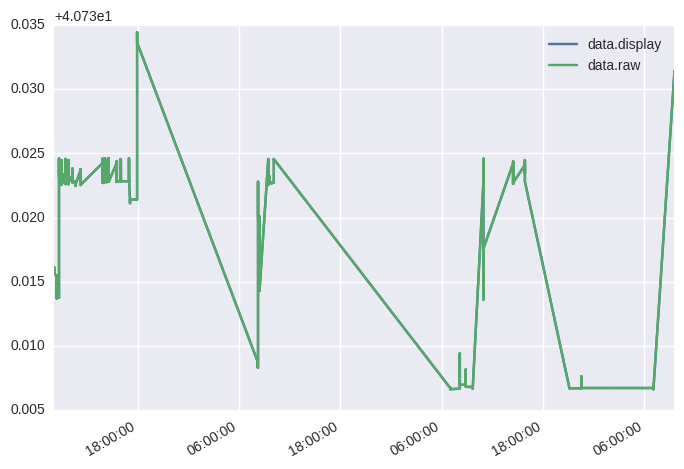

In [15]:
latG.plot()

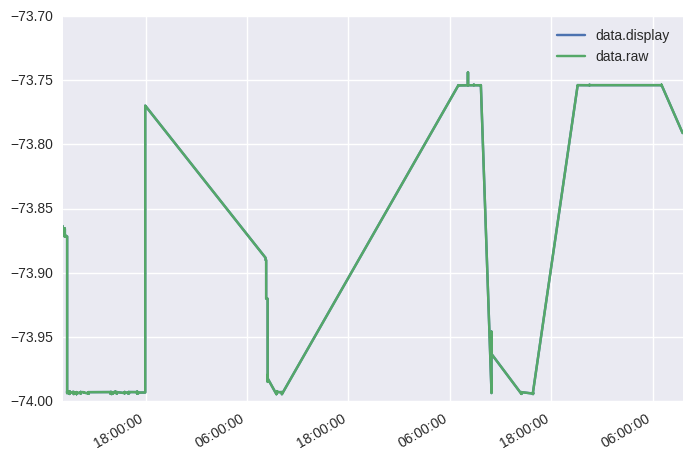

In [16]:
lonG.plot()

In [17]:
ip.device.unique()

array(['GPS', 'Gyrometer (smooth)', 'Attitude', 'Acceleration (via User)',
       'Acceleration (via Gravity)', 'Accelerometer (raw)',
       'Acceleration (total)', 'Bluetooth', 'Altimeter (Barometer)',
       'Gyrometer (raw)', 'Cell Radio', 'Proximity', 'Battery',
       'Device Orientation', 'Magnetometer (corrected for device)',
       'Magnetometer (raw)', 'Screen', 'Compass', 'Microphone', 'Storage',
       'Memory', 'Device', 'WiFi'], dtype=object)

In [18]:
mic = ip.loc[ip.device == "Microphone", :]

micG = mic.loc[mic._user_id == "Glen", :]
micE = mic.loc[mic._user_id == "Emil", :]

In [19]:
micEleft = micE.loc[micE['data.name'] == "Left Channel Level", :]
micEright = micE.loc[micE['data.name'] == "Right Channel Level", :]

micGleft = micG.loc[micG['data.name'] == "Left Channel Level", :]
micGright = micG.loc[micG['data.name'] == "Right Channel Level", :]

(array([    0.,   200.,   400.,   600.,   800.,  1000.]),
 <a list of 6 Text xticklabel objects>)

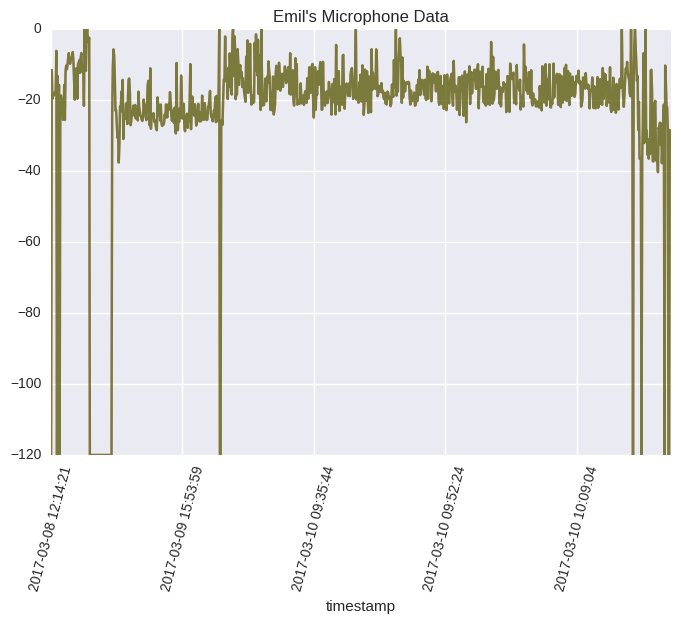

In [20]:
pd.to_numeric(micEleft['data.raw']).plot(color='red', alpha = .5)
pd.to_numeric(micEright['data.raw']).plot(color='green', alpha = .5)
plt.title("Emil's Microphone Data")
plt.xticks(rotation = 75)

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 8 Text xticklabel objects>)

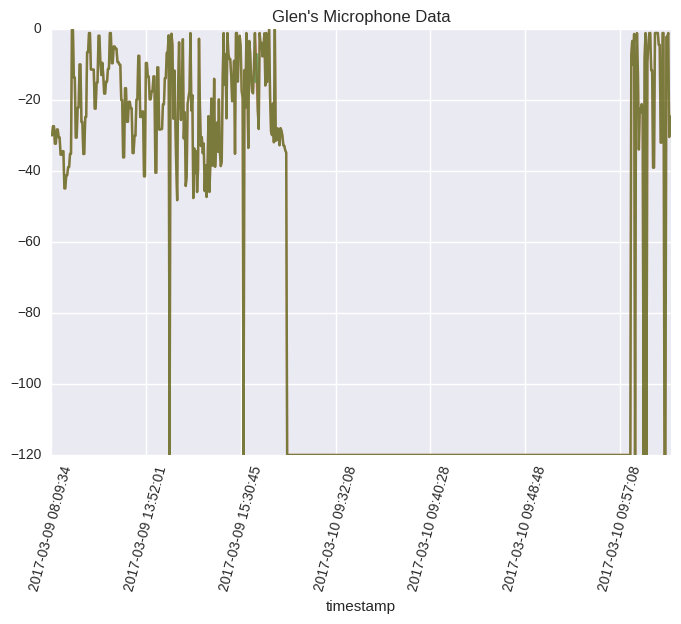

In [21]:
pd.to_numeric(micGleft['data.raw']).plot(color='red', alpha = .5)
pd.to_numeric(micGright['data.raw']).plot(color='green', alpha = .5)
plt.title("Glen's Microphone Data")
plt.xticks(rotation = 75)

In [22]:
ip.device.unique()

array(['GPS', 'Gyrometer (smooth)', 'Attitude', 'Acceleration (via User)',
       'Acceleration (via Gravity)', 'Accelerometer (raw)',
       'Acceleration (total)', 'Bluetooth', 'Altimeter (Barometer)',
       'Gyrometer (raw)', 'Cell Radio', 'Proximity', 'Battery',
       'Device Orientation', 'Magnetometer (corrected for device)',
       'Magnetometer (raw)', 'Screen', 'Compass', 'Microphone', 'Storage',
       'Memory', 'Device', 'WiFi'], dtype=object)

In [23]:
battery = ip.loc[(ip.device == "Battery") & (ip['data.name'] == "Level"), :]
#battery = battery.loc[(battery['data.raw'] != "Discharging") & (battery['data.raw'] != "Charging"), :]

batteryG = battery.loc[battery._user_id == "Glen", :]
batteryE = battery.loc[battery._user_id == "Emil", :]

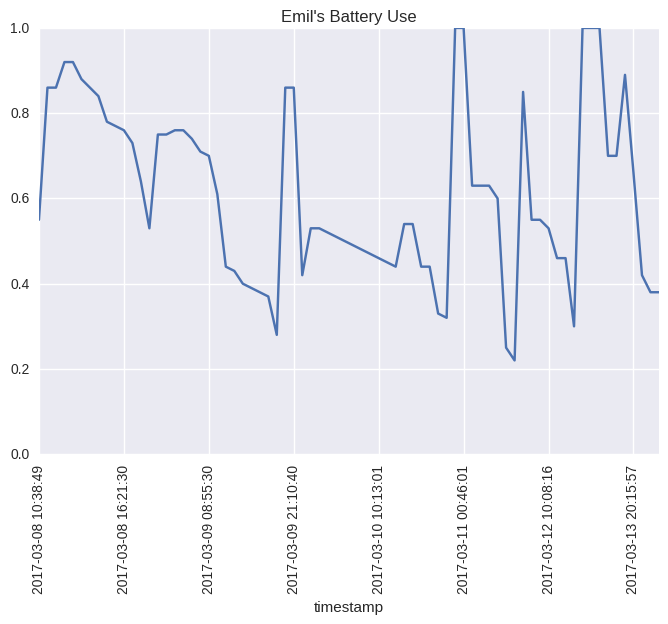

In [24]:
pd.to_numeric(batteryE['data.raw']).plot()
plt.xticks(rotation='vertical')
plt.ylim(0, 1)
plt.title("Emil's Battery Use")

In [25]:
ip.device.unique()

array(['GPS', 'Gyrometer (smooth)', 'Attitude', 'Acceleration (via User)',
       'Acceleration (via Gravity)', 'Accelerometer (raw)',
       'Acceleration (total)', 'Bluetooth', 'Altimeter (Barometer)',
       'Gyrometer (raw)', 'Cell Radio', 'Proximity', 'Battery',
       'Device Orientation', 'Magnetometer (corrected for device)',
       'Magnetometer (raw)', 'Screen', 'Compass', 'Microphone', 'Storage',
       'Memory', 'Device', 'WiFi'], dtype=object)

In [26]:
altimeter = ip.loc[(ip.device == "Altimeter (Barometer)") & (ip['data.name'] == "Pressure"), :]

altimeterG = altimeter.loc[altimeter._user_id == "Glen", :]
altimeterE = altimeter.loc[altimeter._user_id == "Emil", :]

(array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.]),
 <a list of 8 Text xticklabel objects>)

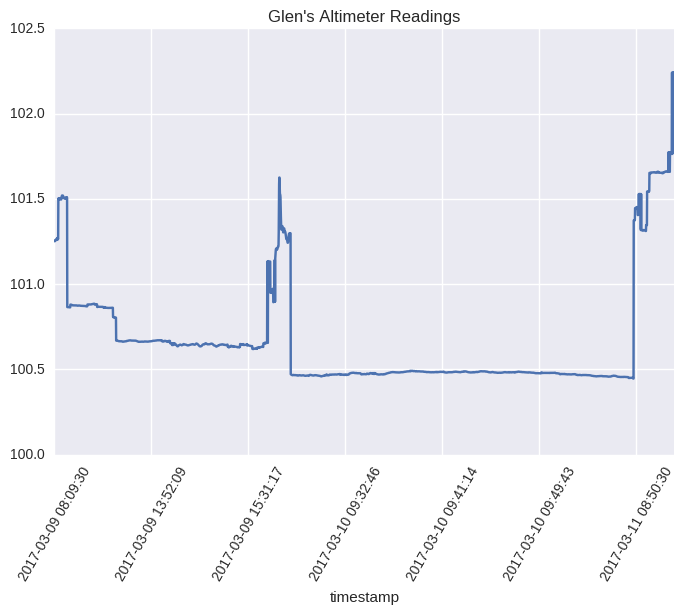

In [27]:
pd.to_numeric(altimeterG['data.raw']).plot()
plt.title("Glen's Altimeter Readings")
plt.xticks(rotation=60)

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 6 Text xticklabel objects>)

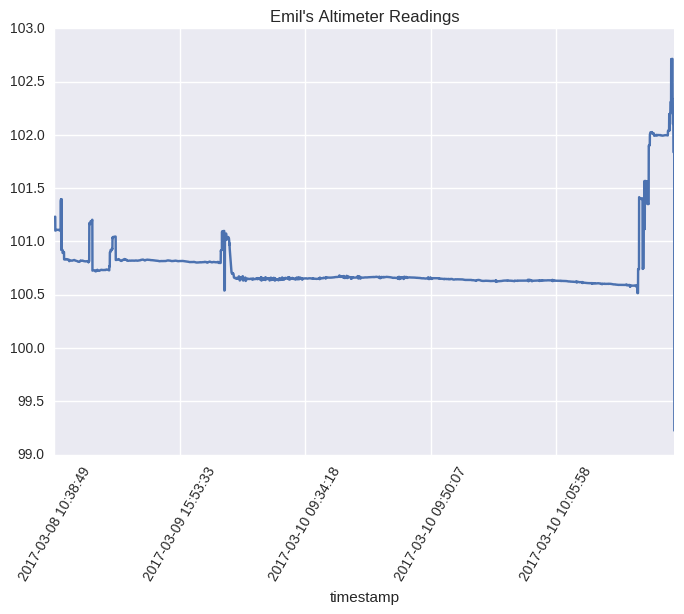

In [28]:
pd.to_numeric(altimeterE['data.raw']).plot()
plt.title("Emil's Altimeter Readings")
plt.xticks(rotation=60)

In [29]:
accel = ip.loc[(ip.device == "Acceleration (via User)"), :]
accel['data.raw'] = pd.to_numeric(accel['data.raw'])
accel['data.display'] = pd.to_numeric(accel['data.display'])

accelGx = accel.loc[(accel._user_id == "Glen") & (accel['data.name'] == "x"), :]
accelGy = accel.loc[(accel._user_id == "Glen") & (accel['data.name'] == "y"), :]
accelGz = accel.loc[(accel._user_id == "Glen") & (accel['data.name'] == "z"), :]

accelEx = accel.loc[(accel._user_id == "Emil") & (accel['data.name'] == "x"), :]
accelEy = accel.loc[(accel._user_id == "Emil") & (accel['data.name'] == "y"), :]
accelEz = accel.loc[(accel._user_id == "Emil") & (accel['data.name'] == "z"), :]

/home/andrew/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/andrew/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


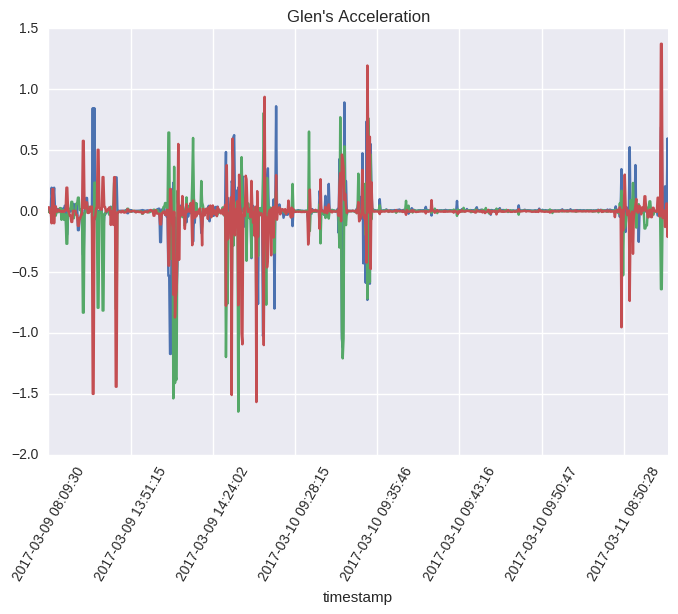

In [30]:
accelGx['data.raw'].plot()
accelGy['data.raw'].plot()
accelGz['data.raw'].plot()
plt.xticks(rotation=60)
plt.title("Glen's Acceleration")

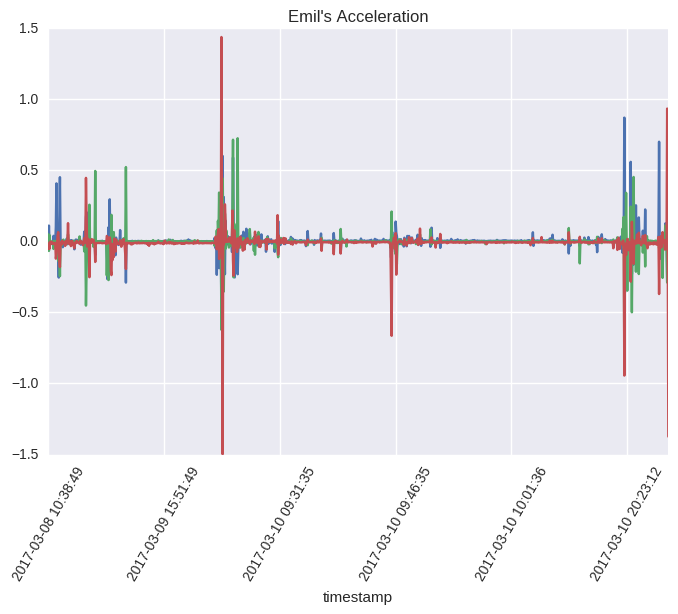

In [31]:
accelEx['data.raw'].plot()
accelEy['data.raw'].plot()
accelEz['data.raw'].plot()
plt.xticks(rotation=60)
plt.title("Emil's Acceleration")